In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import operator
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence 
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv(r"C:\Users\intern\Desktop\Internship projects\Sentiment Analysis\E- Gopala\EGopala_Reviews.csv")
data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,036d127e-3a15-4ade-abac-1c14ec6e4d95,THE GAMER,https://play-lh.googleusercontent.com/a-/AD_cM...,It's good,5,0,2.0.6,2023-05-05 13:28:07,NaN,NaN,2.0.6
1,1,f5de0589-a2fe-492d-8cf2-93bac2006d8b,G Sunar,https://play-lh.googleusercontent.com/a-/AD_cM...,Nice,5,0,NaN,2023-03-24 09:54:08,NaN,NaN,NaN
2,2,c587dc34-fbd3-46ec-9f06-cbb12ca9ee7a,kishor M,https://play-lh.googleusercontent.com/a-/AD_cM...,It is not working now please clear all problems,1,2,2.0.8,2023-03-15 09:30:58,NaN,NaN,2.0.8
3,3,b62a2504-b51f-488f-9370-f2c1d50f3b69,Md Tamzir Alam,https://play-lh.googleusercontent.com/a-/AD_cM...,Good,3,0,2.0.8,2023-03-09 22:08:39,NaN,NaN,2.0.8
4,4,4bd382be-f22b-43f4-bb1d-595d5ea138a4,raghavendra pandey,https://play-lh.googleusercontent.com/a/AAcHTt...,Worst app,1,0,NaN,2023-02-18 09:40:44,NaN,NaN,NaN


In [3]:
df = data[['content']]
df.head()

,content
0,It's good
1,Nice
2,It is not working now please clear all problems
3,Good
4,Worst app


In [4]:
# helper function to draw percentage above each bar
def draw_percentage(ax,total=float(len(data))):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center',va='bottom')

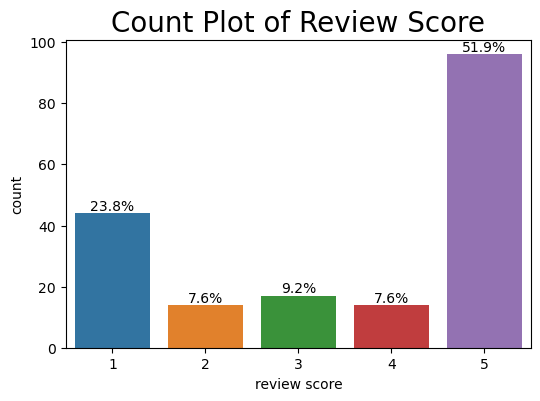

In [5]:
plt.figure(figsize = (6,4))
total = float(len(df))
ax = sns.countplot(x = 'score',data=data)
plt.title('Count Plot of Review Score', fontsize=20)
plt.xlabel('review score')
draw_percentage(ax)
plt.show()

C:\Users\intern\AppData\Local\Temp\ipykernel_9784\4002737304.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['score'], bins = 5)


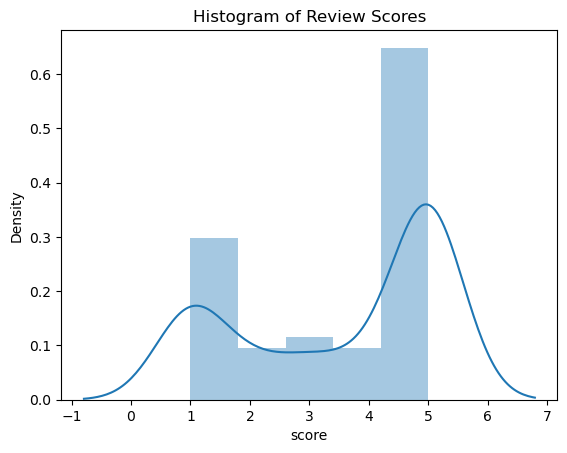

Most Common Score:  5


In [6]:
#Plot a histogram of review scores. These can be accessed in the df.score field in the above dataframe.

sns.distplot(data['score'], bins = 5)
plt.title("Histogram of Review Scores")
plt.show()
print("Most Common Score: ", data.score.value_counts().index[0])

# Flair

In [7]:
sia = SentimentIntensityAnalyzer()

In [8]:
df['scores'] = data['content'].apply(lambda content: sia.polarity_scores(content))
df.head()

C:\Users\intern\AppData\Local\Temp\ipykernel_9784\2441608985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scores'] = data['content'].apply(lambda content: sia.polarity_scores(content))


,content,scores
0,It's good,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,Nice,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,It is not working now please clear all problems,"{'neg': 0.352, 'neu': 0.452, 'pos': 0.196, 'co..."
3,Good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
4,Worst app,"{'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'comp..."


In [9]:
results = []
for i in df['content']:
    pol_score = sia.polarity_scores(i)
    pol_score['content'] = i
    results.append(pol_score)
    
    print(results[-1])
    print("")
print(results[-1])

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404, 'content': "It's good"}

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215, 'content': 'Nice'}

{'neg': 0.352, 'neu': 0.452, 'pos': 0.196, 'compound': -0.2644, 'content': 'It is not working now please clear all problems'}

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404, 'content': 'Good'}

{'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249, 'content': 'Worst app'}

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'content': 'Om'}

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994, 'content': 'Super'}

{'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'compound': -0.6249, 'content': "The worst app than one can expect. Even basic information is not available. The class it is expected to serve would not be able to understand it's language."}

{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404, 'content': 'Seems good info and resources. Is this available in Hindi?'}

{'neg': 0.0, 'neu': 0.0, 'p

In [10]:
data = pd.DataFrame.from_records(results)
data.head()

,neg,neu,pos,compound,content
0,0.000,0.256,0.744,0.4404,It's good
1,0.000,0.000,1.000,0.4215,Nice
2,0.352,0.452,0.196,-0.2644,It is not working now please clear all problems
3,0.000,0.000,1.000,0.4404,Good
4,0.804,0.196,0.000,-0.6249,Worst app


In [11]:
data['label']=0
data.loc[data['compound'] > 0.2, 'label'] = 1
data.loc[data['compound'] < -0.2, 'label'] = -1
data.head()

,neg,neu,pos,compound,content,label
0,0.000,0.256,0.744,0.4404,It's good,1
1,0.000,0.000,1.000,0.4215,Nice,1
2,0.352,0.452,0.196,-0.2644,It is not working now please clear all problems,-1
3,0.000,0.000,1.000,0.4404,Good,1
4,0.804,0.196,0.000,-0.6249,Worst app,-1


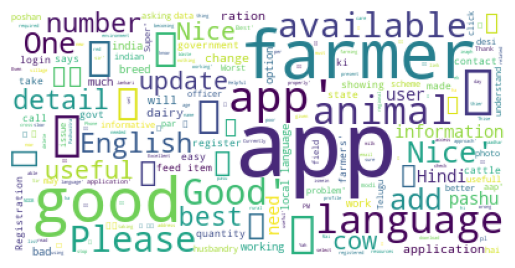

In [16]:
text = df['content'].values 

wordcloud = WordCloud(background_color='white').generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

C:\Users\intern\AppData\Local\Temp\ipykernel_9784\3046492089.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['label'], bins = 5)


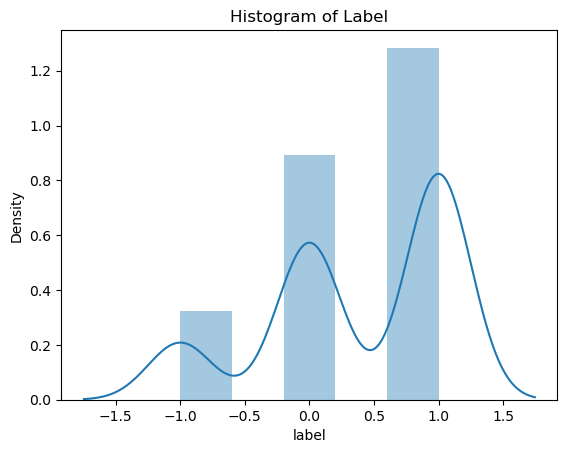

Most Common Score:  1


In [14]:
#Plot a histogram of review scores. These can be accessed in the df.score field in the above dataframe.

sns.distplot(data['label'], bins = 5)
plt.title("Histogram of Label")
plt.show()
print("Most Common Score: ", data.label.value_counts().index[0])